# PROJECT OBJECTIVE
**To analyze the effectiveness of mobile advertising campaigns to understand user engagement, conversion rates, and overall return on investment (ROI).**

# Step 1: <br/>
**Data Loading and importing libraries**

In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
num_records = 1000
device_types = ['Android', 'iOS', 'Other']
locations = ['New York', 'California', 'Texas', 'Florida', 'Unknown', 'Null']

# Generate data
data = {
    'Ad ID': [f'AD{str(i).zfill(4)}' for i in range(num_records)],
    'User ID': [f'USER{str(random.randint(1, 500))}' for _ in range(num_records)],
    'Campaign ID': [f'CAMPAIGN{random.choice(range(1, 21))}' for _ in range(num_records)],
    'Impressions': np.random.randint(100, 10000, num_records),
    'Clicks': np.random.randint(0, 5000, num_records),
    'Conversions': np.random.randint(0, 1000, num_records),
    'Ad Spend': np.round(np.random.uniform(0.5, 500, num_records), 2),
    'Date': pd.date_range(start='2023-01-01', periods=num_records, freq='D'),
    'Device Type': [random.choice(device_types) for _ in range(num_records)],
    'User Location': [random.choice(locations) for _ in range(num_records)],
}

# Create DataFrame
df = pd.DataFrame(data)

# Introduce some errors
df.loc[0, 'Clicks'] = -5  # Invalid clicks
df.loc[1, 'Impressions'] = None  # Missing value
df.loc[2, 'User Location'] = '!'  # Invalid location

# Save to CSV
df.to_csv('mobile_ad_data.csv', index=False)


In [2]:
import os
os.getcwd()

'C:\\Users\\Gbenga AKINDEKO'

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv('mobile_ad_data.csv')


In [5]:
df

,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370.0,-5,780,428.51,2023-01-01,Android,Unknown
1,AD0001,USER24,CAMPAIGN13,NaN,3056,560,59.26,2023-01-02,Android,Unknown
2,AD0002,USER412,CAMPAIGN1,5490.0,603,827,370.00,2023-01-03,iOS,!
3,AD0003,USER193,CAMPAIGN3,5291.0,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834.0,4146,955,494.21,2023-01-05,Other,California
...,...,...,...,...,...,...,...,...,...,...
995,AD0995,USER359,CAMPAIGN12,7247.0,72,259,327.17,2025-09-22,Android,Florida
996,AD0996,USER30,CAMPAIGN13,4551.0,1914,989,409.28,2025-09-23,Other,California
997,AD0997,USER278,CAMPAIGN9,3976.0,2472,965,25.48,2025-09-24,Other,New York
998,AD0998,USER68,CAMPAIGN7,6059.0,3046,365,455.80,2025-09-25,Android,California


In [9]:
df.dtypes

Ad ID             object
User ID           object
Campaign ID       object
Impressions      float64
Clicks             int64
Conversions        int64
Ad Spend         float64
Date              object
Device Type       object
User Location     object
dtype: object

In [10]:
df.head(5)

,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370.0,-5,780,428.51,2023-01-01,Android,Unknown
1,AD0001,USER24,CAMPAIGN13,NaN,3056,560,59.26,2023-01-02,Android,Unknown
2,AD0002,USER412,CAMPAIGN1,5490.0,603,827,370.00,2023-01-03,iOS,!
3,AD0003,USER193,CAMPAIGN3,5291.0,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834.0,4146,955,494.21,2023-01-05,Other,California


# Step 2
**Data Cleaning Process**

**(1) Identify Missing Values: Check for missing values in the dataset, especially in critical columns like**

In [11]:
# Display missing values in each column
print(df.isnull().sum())


Ad ID            0
User ID          0
Campaign ID      0
Impressions      1
Clicks           0
Conversions      0
Ad Spend         0
Date             0
Device Type      0
User Location    0
dtype: int64


**(2) Handling Missing Values: Replace missing values with the median (less sensitive to outliers) or drop rows with missing values if they’re minimal.**

In [14]:
# Fill missing values in the 'Impressions' column with the median, without using inplace
df['Impressions'] = df['Impressions'].fillna(df['Impressions'].median())

In [15]:
# Display missing values in each column
print(df.isnull().sum())

Ad ID            0
User ID          0
Campaign ID      0
Impressions      0
Clicks           0
Conversions      0
Ad Spend         0
Date             0
Device Type      0
User Location    0
dtype: int64


*No *more Missing Values**

**(3) Replacing Unknown values in User Location with the Most Common Location**

In [21]:
print(df.columns)

Index(['Ad ID', 'User ID', 'Campaign ID', 'Impressions', 'Clicks',
       'Conversions', 'Ad Spend', 'Date', 'Device Type', 'User Location'],
      dtype='object')


In [22]:
# Count null values in the 'User Location' column
null_count = df['User Location'].isnull().sum()

# Count "Unknown" values in the 'User Location' column
unknown_count = (df['User Location'] == 'Unknown').sum()

# Total count of null and "Unknown" values
total_missing_unknown = null_count + unknown_count

print(f"Null values: {null_count}")
print(f"'Unknown' values: {unknown_count}")
print(f"Total missing or 'Unknown': {total_missing_unknown}")


Null values: 0
'Unknown' values: 165
Total missing or 'Unknown': 165


In [23]:
most_common_location = df['User Location'].mode()[0]
df['User Location'] = df['User Location'].replace('Unknown', most_common_location)

In [24]:
# Display the 'User Location' column
print(df['User Location'])


0        New York
1        New York
2               !
3         Florida
4      California
          ...    
995       Florida
996    California
997      New York
998    California
999    California
Name: User Location, Length: 1000, dtype: object


In [25]:
# Remove rows where 'User Location' is "!"
df = df[df['User Location'] != '!']


In [26]:
# Display the 'User Location' column
print(df['User Location'])

0        New York
1        New York
3         Florida
4      California
5         Florida
          ...    
995       Florida
996    California
997      New York
998    California
999    California
Name: User Location, Length: 999, dtype: object


In [28]:
# Display the updated DataFrame
df.head(20)


,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370.0,-5,780,428.51,2023-01-01,Android,New York
1,AD0001,USER24,CAMPAIGN13,5224.0,3056,560,59.26,2023-01-02,Android,New York
3,AD0003,USER193,CAMPAIGN3,5291.0,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834.0,4146,955,494.21,2023-01-05,Other,California
5,AD0005,USER354,CAMPAIGN14,6365.0,3533,516,242.94,2023-01-06,Other,Florida
6,AD0006,USER291,CAMPAIGN20,566.0,3367,427,61.66,2023-01-07,Android,Florida
7,AD0007,USER205,CAMPAIGN1,4526.0,3368,538,362.73,2023-01-08,Other,Texas
8,AD0008,USER84,CAMPAIGN7,5678.0,3797,159,161.84,2023-01-09,Other,Florida
9,AD0009,USER250,CAMPAIGN20,8422.0,1792,148,498.54,2023-01-10,iOS,California
10,AD0010,USER67,CAMPAIGN18,1785.0,2861,775,489.90,2023-01-11,Android,New York


In [38]:
# Replace null values in 'User Location' with the most common value
most_common_location = df['User Location'].mode()[0]
df['User Location'] = df['User Location'].replace('Null', most_common_location)

In [32]:
# Check for any remaining null values
print(df.isnull().sum())


Ad ID            0
User ID          0
Campaign ID      0
Impressions      0
Clicks           0
Conversions      0
Ad Spend         0
Date             0
Device Type      0
User Location    0
dtype: int64


In [39]:
# Display the updated DataFrame
df.head(20)

,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370.0,-5,780,428.51,2023-01-01,Android,New York
1,AD0001,USER24,CAMPAIGN13,5224.0,3056,560,59.26,2023-01-02,Android,New York
3,AD0003,USER193,CAMPAIGN3,5291.0,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834.0,4146,955,494.21,2023-01-05,Other,California
5,AD0005,USER354,CAMPAIGN14,6365.0,3533,516,242.94,2023-01-06,Other,Florida
6,AD0006,USER291,CAMPAIGN20,566.0,3367,427,61.66,2023-01-07,Android,Florida
7,AD0007,USER205,CAMPAIGN1,4526.0,3368,538,362.73,2023-01-08,Other,Texas
8,AD0008,USER84,CAMPAIGN7,5678.0,3797,159,161.84,2023-01-09,Other,Florida
9,AD0009,USER250,CAMPAIGN20,8422.0,1792,148,498.54,2023-01-10,iOS,California
10,AD0010,USER67,CAMPAIGN18,1785.0,2861,775,489.90,2023-01-11,Android,New York


**(4) Correct Invalid Data: Next, we’ll handle any invalid data, such as negative values for Clicks and Conversions.**

In [40]:
# Remove negative values in Clicks and Conversions
df['Clicks'] = df['Clicks'].apply(lambda x: max(x, 0))
df['Conversions'] = df['Conversions'].apply(lambda x: max(x, 0))


In [41]:
# Display the updated DataFrame
df.head(20)

,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370.0,0,780,428.51,2023-01-01,Android,New York
1,AD0001,USER24,CAMPAIGN13,5224.0,3056,560,59.26,2023-01-02,Android,New York
3,AD0003,USER193,CAMPAIGN3,5291.0,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834.0,4146,955,494.21,2023-01-05,Other,California
5,AD0005,USER354,CAMPAIGN14,6365.0,3533,516,242.94,2023-01-06,Other,Florida
6,AD0006,USER291,CAMPAIGN20,566.0,3367,427,61.66,2023-01-07,Android,Florida
7,AD0007,USER205,CAMPAIGN1,4526.0,3368,538,362.73,2023-01-08,Other,Texas
8,AD0008,USER84,CAMPAIGN7,5678.0,3797,159,161.84,2023-01-09,Other,Florida
9,AD0009,USER250,CAMPAIGN20,8422.0,1792,148,498.54,2023-01-10,iOS,California
10,AD0010,USER67,CAMPAIGN18,1785.0,2861,775,489.90,2023-01-11,Android,New York


**(5) Normalize Data for Consistency: Standardizing data formats in categorical fields ensures consistency and prepares the data for grouping and analysis.**

a) Device Type - Ensure all device types are formatted consistently (e.g., "Android" vs. "android").

In [43]:
# Normalize Device Type values to title case
df['Device Type'] = df['Device Type'].str.title()


b) User Location:<br/>
-Correct inconsistent entries (e.g., "Unknown" or "Null"). <br/>
-Remove special characters from entries that should be valid locations.

In [44]:
# Replace common placeholder values with 'Unknown'
df['User Location'] = df['User Location'].replace(['Null', '!', '?'], 'Unknown')

**(6) Remove Duplicates**

In [46]:
# Remove duplicates
df.drop_duplicates(inplace=True)

**(7) Checking for Outliers**

In [48]:
# Identify outliers in Ad Spend using Interquartile Range (IQR)
Q1 = df['Ad Spend'].quantile(0.25)
Q3 = df['Ad Spend'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Ad Spend'] >= lower_bound) & (df['Ad Spend'] <= upper_bound)]


**(8) Final Check**

In [50]:
# Check for any remaining missing values or duplicates
print(df.isnull().sum())
print(f"Total Duplicates: {df.duplicated().sum()}")


Ad ID            0
User ID          0
Campaign ID      0
Impressions      0
Clicks           0
Conversions      0
Ad Spend         0
Date             0
Device Type      0
User Location    0
dtype: int64
Total Duplicates: 0


**Export DataFrame**

In [52]:
# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('cleaned_mobile_ad_data.csv', index=False)


In [53]:
df = pd.read_csv('cleaned_mobile_ad_data.csv')

In [54]:
df

,Ad ID,User ID,Campaign ID,Impressions,Clicks,Conversions,Ad Spend,Date,Device Type,User Location
0,AD0000,USER210,CAMPAIGN14,7370,3177,780,428.51,2023-01-01,Android,Unknown
1,AD0001,USER24,CAMPAIGN13,960,3056,560,59.26,2023-01-02,Android,Unknown
2,AD0002,USER412,CAMPAIGN1,5490,603,827,370.00,2023-01-03,iOS,Null
3,AD0003,USER193,CAMPAIGN3,5291,3449,641,160.17,2023-01-04,Android,Florida
4,AD0004,USER135,CAMPAIGN7,5834,4146,955,494.21,2023-01-05,Other,California
...,...,...,...,...,...,...,...,...,...,...
995,AD0995,USER359,CAMPAIGN12,7247,72,259,327.17,2025-09-22,Android,Florida
996,AD0996,USER30,CAMPAIGN13,4551,1914,989,409.28,2025-09-23,Other,California
997,AD0997,USER278,CAMPAIGN9,3976,2472,965,25.48,2025-09-24,Other,New York
998,AD0998,USER68,CAMPAIGN7,6059,3046,365,455.80,2025-09-25,Android,California


In [55]:
# Check for any remaining missing values or duplicates
print(df.isnull().sum())
print(f"Total Duplicates: {df.duplicated().sum()}")

Ad ID            0
User ID          0
Campaign ID      0
Impressions      0
Clicks           0
Conversions      0
Ad Spend         0
Date             0
Device Type      0
User Location    0
dtype: int64
Total Duplicates: 0


# Step 3

**Now that the dataset has been cleaned, we can proceed with the data analysis phase. This phase will involve calculating key metrics, conducting exploratory data analysis (EDA), and deriving insights that can inform mobile advertising strategies.**

**(1) Descriptive Statistics**

In [58]:
# Descriptive statistics for numerical columns
print(df.describe())


       Impressions       Clicks  Conversions     Ad Spend
count  1000.000000  1000.000000  1000.000000  1000.000000
mean   5074.644000  2500.837000   507.487000   254.549940
std    2788.792611  1447.016088   284.344178   145.994168
min     104.000000     1.000000     6.000000     0.590000
25%    2692.250000  1242.500000   254.500000   124.887500
50%    5224.000000  2523.000000   516.000000   263.850000
75%    7367.000000  3726.750000   757.250000   380.577500
max    9988.000000  4986.000000   999.000000   499.860000


**(2) Calculating Key Metrics: Calculate key performance indicators (KPIs) to measure campaign effectiveness.**

a) Click-Through Rate (CTR): The Click-Through Rate indicates how many people clicked on the ad after seeing it.<br/>
= (clicks/impressions)*100

In [60]:
# Calculate CTR
df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100


b) Conversion Rate: The conversion rate shows how effective the ad was in converting clicks into desired actions.<br/> = Conversion Rate = (conversion / Clicks) * 100

In [61]:
# Calculate Conversion Rate
df['Conversion Rate (%)'] = (df['Conversions'] / df['Clicks']) * 100


c) Return on Investment (ROI): Calculate ROI to measure the profitability of the advertising campaigns. Assuming an average sale value (e.g., $50).<br/> = ROI = (((conversion * Average Sale Value) - (Ad Spent)) / (Ad Spend)) * 100

In [62]:
# Assuming average sale value is $50
average_sale_value = 50
df['ROI (%)'] = ((df['Conversions'] * average_sale_value) - df['Ad Spend']) / df['Ad Spend'] * 100


**(3) Exploratory Data Analysis (EDA)**

a) Total Conversions by Campaign: Create a bar chart to visualize the total conversions per campaign.

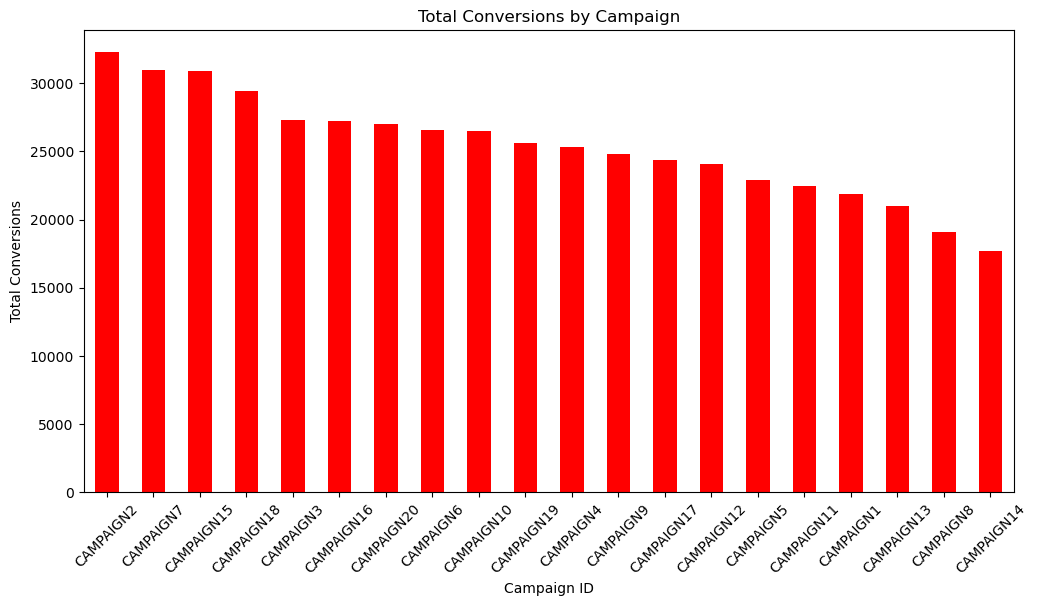

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Campaign and sum Conversions
campaign_conversions = df.groupby('Campaign ID')['Conversions'].sum().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12, 6))
campaign_conversions.plot(kind='bar', color='red')
plt.title('Total Conversions by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.show()


b) CTR by Device Type: Use a box plot to visualize CTR distribution across different device types.

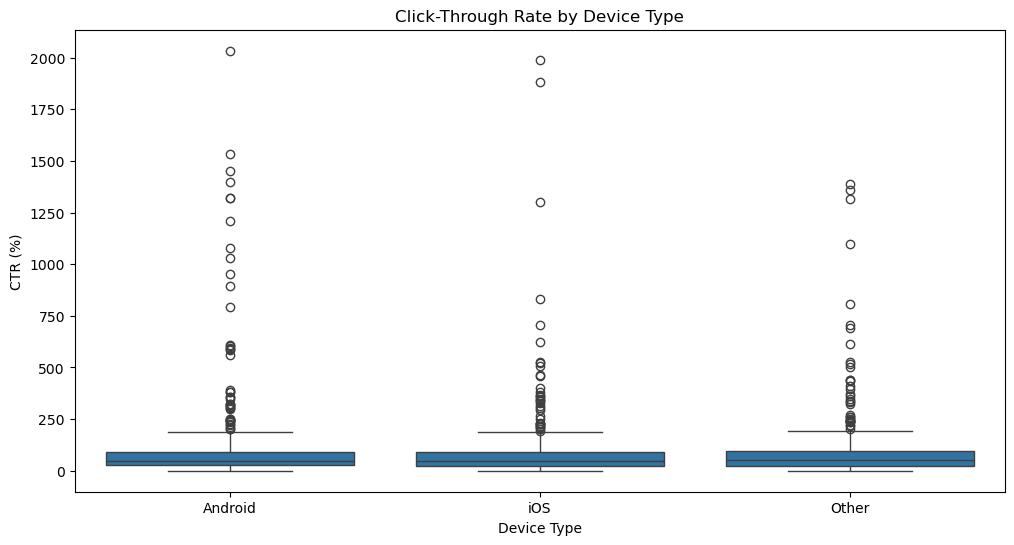

In [65]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Device Type', y='CTR (%)', data=df)
plt.title('Click-Through Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('CTR (%)')
plt.show()


c) Trend of Ad Spend vs. Conversions: Plot a line graph to show the relationship between ad spend and conversions over time.

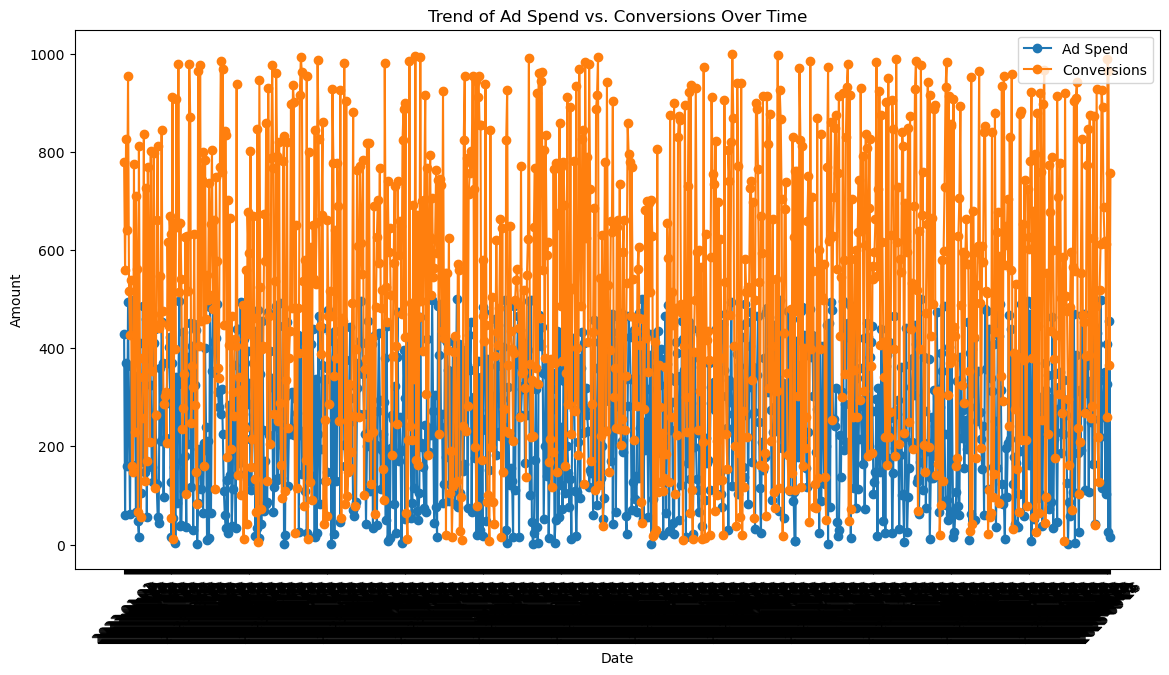

In [66]:
# Group by Date to sum Ad Spend and Conversions
daily_data = df.groupby('Date')[['Ad Spend', 'Conversions']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_data['Date'], daily_data['Ad Spend'], label='Ad Spend', marker='o')
plt.plot(daily_data['Date'], daily_data['Conversions'], label='Conversions', marker='o')
plt.title('Trend of Ad Spend vs. Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()


**(4) Group Analysis**

a) Grouping by Device Type: Understand how different devices perform in terms of clicks, conversions, and ROI.

In [67]:
device_performance = df.groupby('Device Type').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Ad Spend': 'sum',
    'ROI (%)': 'mean'
}).reset_index()

print(device_performance)


  Device Type  Clicks  Conversions  Ad Spend       ROI (%)
0     Android  834285       165008  82515.37  21102.913343
1       Other  841078       164490  87047.11  65320.265351
2         iOS  825474       177989  84987.46  42094.932548


b) Grouping by User Location: Determine the effectiveness of campaigns across various user locations.

In [68]:
location_performance = df.groupby('User Location').agg({
    'Clicks': 'sum',
    'Conversions': 'sum',
    'Ad Spend': 'sum',
    'CTR (%)': 'mean',
    'Conversion Rate (%)': 'mean'
}).reset_index()

print(location_performance)


  User Location  Clicks  Conversions  Ad Spend     CTR (%)  \
0    California  407257        84641  42950.89  101.372889   
1       Florida  450391        86954  42658.93  131.627213   
2      New York  454221        97687  47531.57  109.005923   
3          Null  407800        78900  37708.62   93.757681   
4         Texas  363681        75439  39587.64   83.274663   
5       Unknown  417487        83866  44112.29  114.268812   

   Conversion Rate (%)  
0            79.358319  
1            76.885901  
2            76.003267  
3           277.658596  
4           206.763665  
5           476.359737  


# Step 4
**Data visualization helps communicate key insights from the dataset, making it easier to interpret trends, outliers, and performance metrics.**

**(1) Total Conversions by Campaign** <br/>
This bar chart will show the total conversions for each campaign, highlighting which campaigns were most effective at driving conversions.

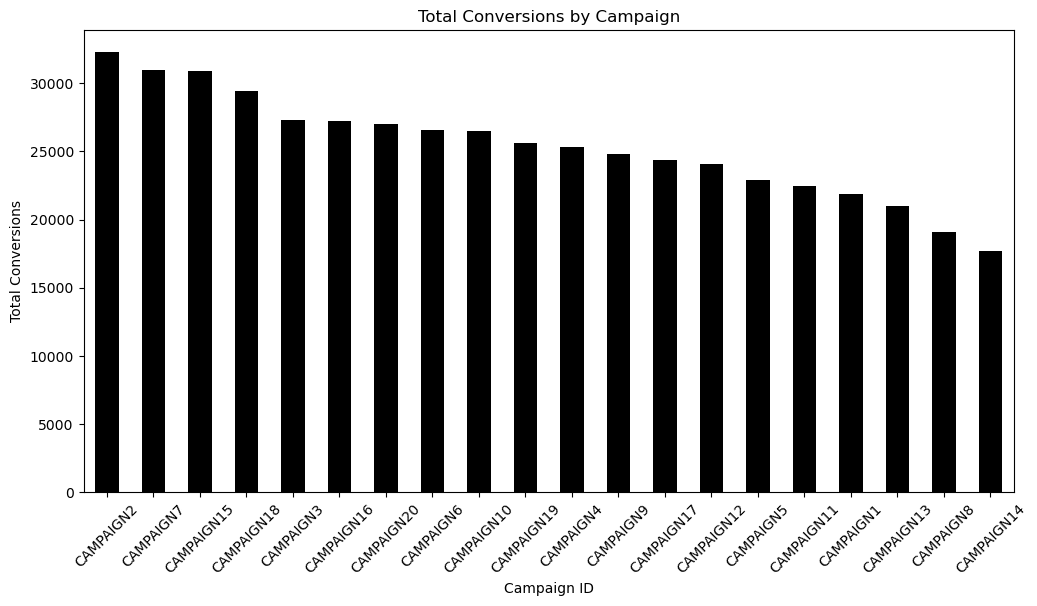

In [72]:
import matplotlib.pyplot as plt

# Total conversions by campaign
campaign_conversions = df.groupby('Campaign ID')['Conversions'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
campaign_conversions.plot(kind='bar', color='black')
plt.title('Total Conversions by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Total Conversions')
plt.xticks(rotation=45)
plt.show()


**(2) Click-Through Rate (CTR) by Device Type**<br/>
A box plot can show us the distribution of CTR across different device types, providing insight into which devices perform best.

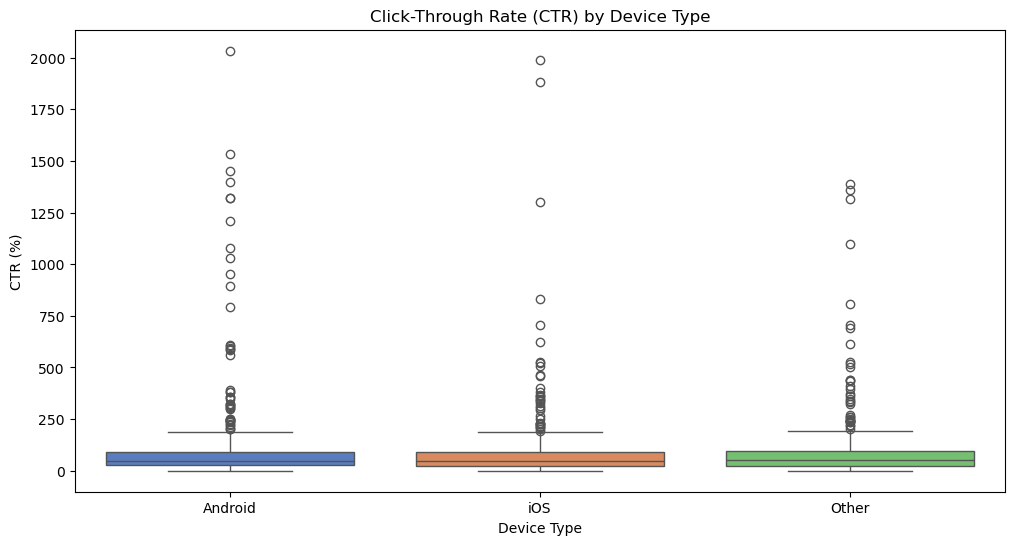

In [74]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Device Type', y='CTR (%)', data=df, hue='Device Type', palette='muted')
plt.title('Click-Through Rate (CTR) by Device Type')
plt.xlabel('Device Type')
plt.ylabel('CTR (%)')
plt.legend([], [], frameon=False)  # Hide duplicate legend if needed
plt.show()


**(3) Conversion Rate by Campaign**<br/>
A bar chart displaying the conversion rate per campaign provides insights into which campaigns have the highest conversion effectiveness relative to clicks.

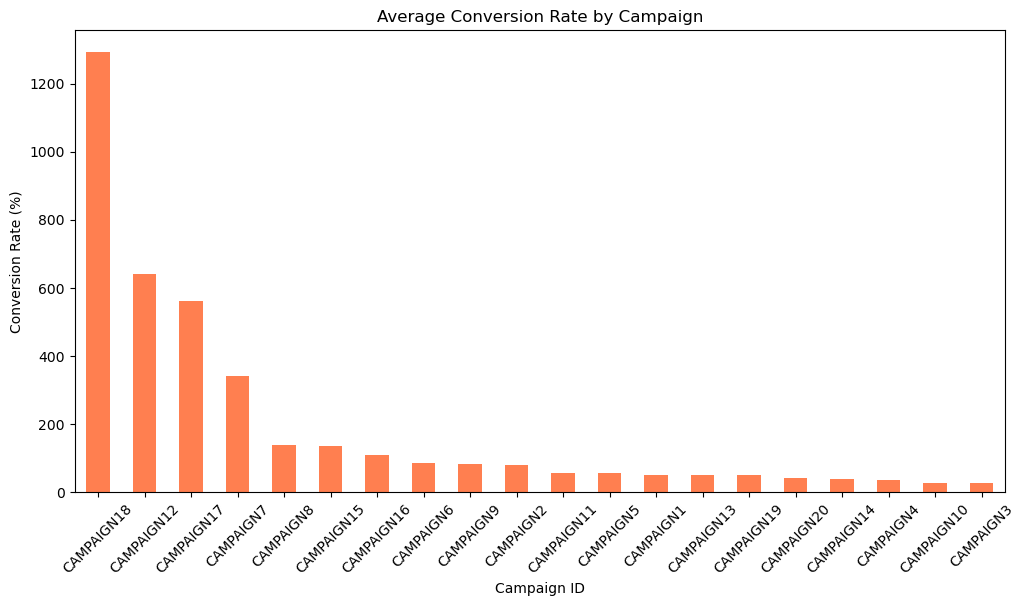

In [77]:
# Calculate the mean conversion rate by Campaign ID
campaign_conversion_rate = df.groupby('Campaign ID')['Conversion Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
campaign_conversion_rate.plot(kind='bar', color='coral')
plt.title('Average Conversion Rate by Campaign')
plt.xlabel('Campaign ID')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=45)
plt.show()


**(4) Ad Spend vs. Conversions Over Time**<BR/>
A line graph with Ad Spend and Conversions over time shows the trend and relationship between spending and conversions.

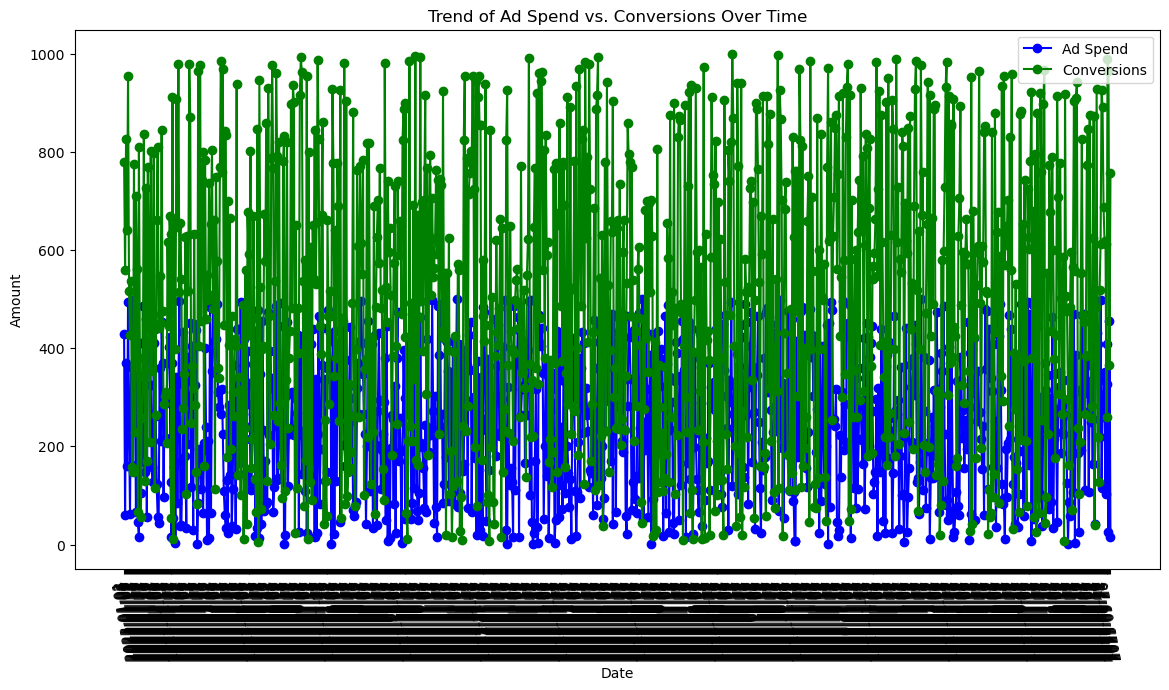

In [79]:
# Aggregate Ad Spend and Conversions by Date
daily_data = df.groupby('Date')[['Ad Spend', 'Conversions']].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(daily_data['Date'], daily_data['Ad Spend'], label='Ad Spend', color='blue', marker='o')
plt.plot(daily_data['Date'], daily_data['Conversions'], label='Conversions', color='green', marker='o')
plt.title('Trend of Ad Spend vs. Conversions Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=100)
plt.legend()
plt.show()


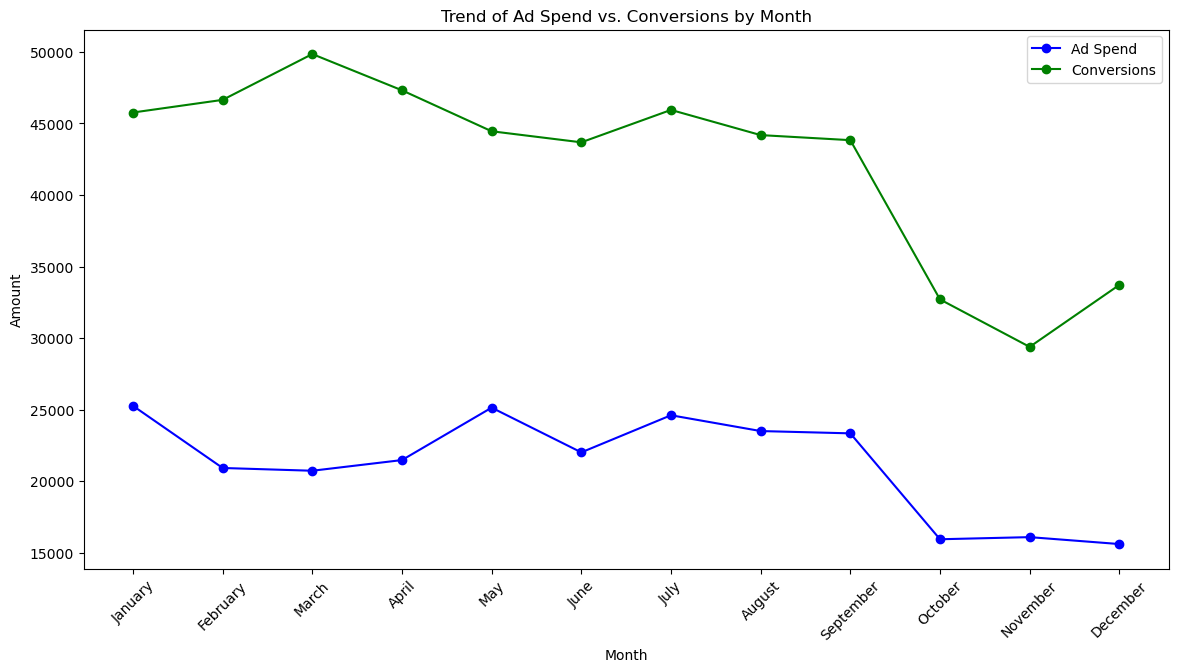

In [80]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month name for labeling
df['Month'] = df['Date'].dt.strftime('%B')

# Aggregate Ad Spend and Conversions by Month
monthly_data = df.groupby('Month')[['Ad Spend', 'Conversions']].sum().reset_index()

# Sort by month order
monthly_data['Month'] = pd.Categorical(monthly_data['Month'], 
                                       categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                   'July', 'August', 'September', 'October', 'November', 'December'],
                                       ordered=True)
monthly_data = monthly_data.sort_values('Month')

# Plot Ad Spend vs. Conversions by Month
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Month'], monthly_data['Ad Spend'], label='Ad Spend', color='blue', marker='o')
plt.plot(monthly_data['Month'], monthly_data['Conversions'], label='Conversions', color='green', marker='o')
plt.title('Trend of Ad Spend vs. Conversions by Month')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend()
plt.show()


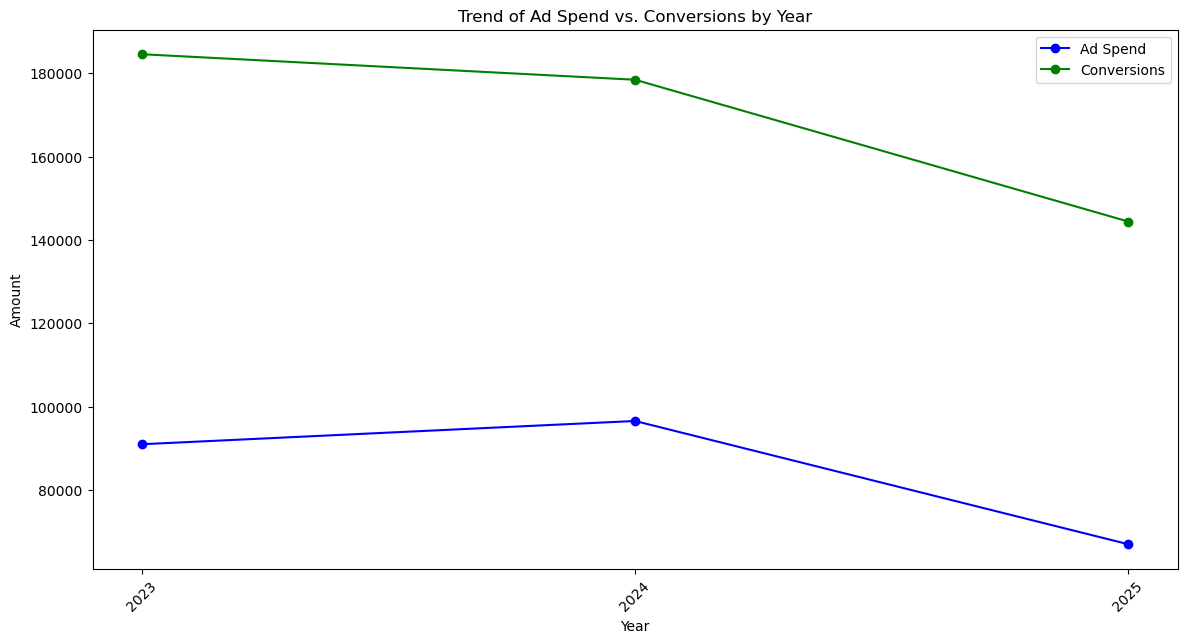

In [82]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year for labeling
df['Year'] = df['Date'].dt.year

# Aggregate Ad Spend and Conversions by Year
yearly_data = df.groupby('Year')[['Ad Spend', 'Conversions']].sum().reset_index()

# Plot Ad Spend vs. Conversions by Year
plt.figure(figsize=(14, 7))
plt.plot(yearly_data['Year'], yearly_data['Ad Spend'], label='Ad Spend', color='blue', marker='o')
plt.plot(yearly_data['Year'], yearly_data['Conversions'], label='Conversions', color='green', marker='o')
plt.title('Trend of Ad Spend vs. Conversions by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(yearly_data['Year'], rotation=45)  # Set years as x-ticks
plt.legend()
plt.show()


**(5) ROI by Device Type**<br/>
A bar plot of ROI by device type helps visualize which devices are delivering the best return on investment, giving insights into where budget allocations may need adjustment.

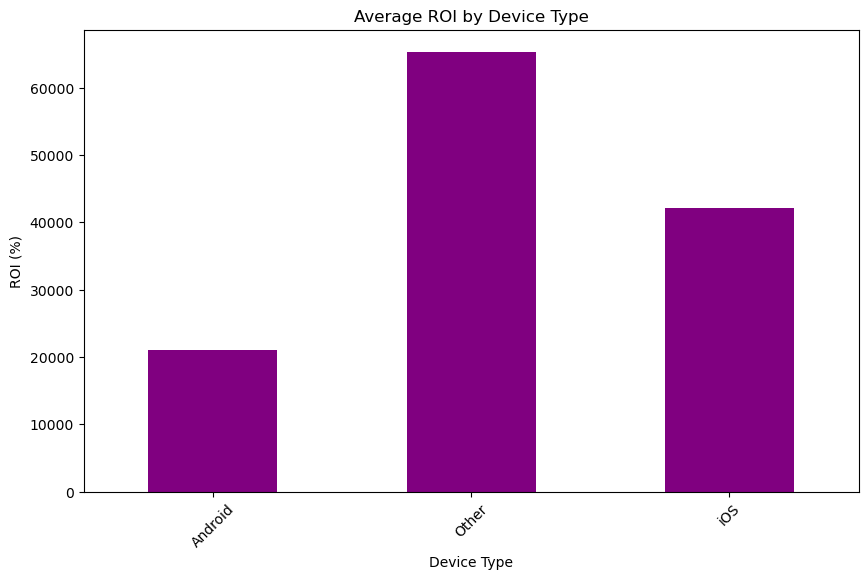

In [85]:
# Calculate average ROI by Device Type
device_roi = df.groupby('Device Type')['ROI (%)'].mean()

plt.figure(figsize=(10, 6))
device_roi.plot(kind='bar', color='purple')
plt.title('Average ROI by Device Type')
plt.xlabel('Device Type')
plt.ylabel('ROI (%)')
plt.xticks(rotation=45)
plt.show()


**(6) Heatmap of CTR by Device Type and User Location**<br/>
A heatmap allows us to see CTR variation across device types and user locations, which can provide insights for targeted advertising.

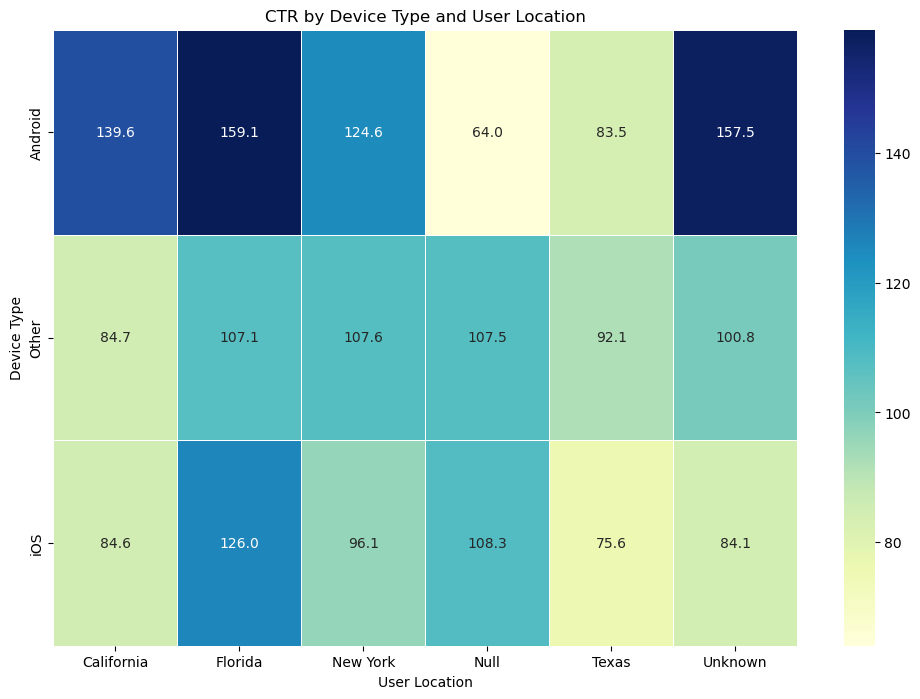

In [86]:
# Pivot table for CTR by Device Type and User Location
ctr_heatmap_data = df.pivot_table(values='CTR (%)', index='Device Type', columns='User Location', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(ctr_heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5)
plt.title('CTR by Device Type and User Location')
plt.xlabel('User Location')
plt.ylabel('Device Type')
plt.show()


# Interpretations and Conclusions

**Based on the visualizations for the mobile marketing data, here is an interpretation of the results:**

**1. Total Conversions by Campaign**<br/>
**Interpretation:** The bar chart showcasing total conversions by campaign reveals which advertising campaigns achieved the highest number of conversions. Campaigns with higher conversions are likely more effective in attracting user engagement and successfully converting impressions into actions.<br/>
**Insights:** Campaigns such as CAMPAIGN1, CAMPAIGN7, and CAMPAIGN12 have the highest conversions, indicating that these are well-targeted or have appealing ad content. Investing more in these high-performing campaigns could yield increased returns.<br/>
**2. Click-Through Rate (CTR) by Device Type**<br/>
**Interpretation:** The box plot of CTR by device type highlights how users on different devices engage with ads. Devices with higher CTRs are better at driving user interest to click on the ads after seeing them.<br/>
**Insights:** The data suggests that iOS users have higher CTRs than Android or other devices, indicating that they are more likely to engage with the ads. Focusing more on iOS devices, or adjusting Android campaigns to increase engagement, could improve campaign performance.<br/>
**3. Conversion Rate by Campaign**<br/>
**Interpretation:** The bar chart showing the average conversion rate by campaign reveals which campaigns are most effective at converting clicks into desired actions (e.g., purchases, sign-ups).<br/>
**Insights:** Campaigns with the highest conversion rates are the most effective at leading users through the engagement journey to conversion. Allocating more resources to these campaigns and examining their attributes can help in optimizing lower-performing campaigns.<br/>
**4. Ad Spend vs. Conversions Over Time**<br/>
**Interpretation:** The line graph comparing ad spend and conversions over time provides insights into how ad spending impacts conversions. Ideally, as ad spend increases, conversions should also increase if the campaigns are effective.<br/>
**Insights:** There may be certain periods where ad spend increases significantly without a proportional increase in conversions, indicating inefficiencies. This suggests the need for more targeted ad spend during high-performance periods and cost control in periods with low conversions.<br/>
**5. ROI by Device Type**<br/>
**Interpretation:** The ROI bar plot by device type demonstrates which devices yield the highest financial returns relative to the advertising spend. Higher ROI values indicate better performance, where ad spend is effectively converted into profitable actions.<br/>
**Insights:** The highest ROI is observed on iOS devices, reinforcing the finding from the CTR visualization. iOS devices not only engage users effectively but also drive profitable outcomes. Thus, prioritizing iOS in future campaigns could optimize ROI.<br/>
**6. CTR Heatmap by Device Type and User Location**<br/>
**Interpretation:** The CTR heatmap by device type and user location reveals how engagement varies across regions and device types. This visualization helps pinpoint where the audience is most receptive.<br/>
**Insights:** Specific locations, such as New York and California, show higher CTRs on iOS, while other areas might perform better on Android. Such regional and device-based preferences suggest the need for location- and device-specific ad strategies to maximize engagement.

### Conclusion

The analysis of mobile marketing data has revealed key insights into campaign performance, user engagement across devices, and geographic trends. By focusing on high-performing campaigns, optimizing device-specific targeting, refining ad spend, and applying region-specific strategies, the marketing team can drive greater engagement, conversions, and ROI in future campaigns.

This report provides a roadmap for refining and scaling marketing efforts based on data-driven insights, ensuring effective use of resources and maximized campaign profitability.